## Notebook for generating trajectories of a particle moving in 2d space and a corresponding video.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import multi_dot as md
from scipy.linalg import expm
import cvxpy as cp

from DataGen_Tools import *
from PlotGP import *

### Generate and save data.

In [3]:
# ----------------------------------------- user defined settings -----------------------------------------------

data_path = '/qfs/projects/atscale/atscale_dyn/Data/GP/Data/'
exp_no = 50 # number of experiments to run where different input signals have been sampled.
batch = 20 # number of trajectories, starting at different initial conditions, generated in response to the same input signal.
seed = np.random.randint(0,100, exp_no) # rng seed for sampling GP

time = np.array([0.0, 5, 1e-1]) # start, stop, step (of integration)
T = np.arange(time[0], time[1]+time[2], time[2]) # Time array of continuous time signal
Ts = 1 # sampling period is Ts*time[2]

# LTI system
p = 2 # dimension of input
n = 4 # dimension of state
m = 2 # dimension of output
cond = 'PE-GPVAE' # LTI system to generate

# GP settings
cov_eta = 1e-3*np.eye(m) # covariance of measurement noise
mean_x0 = np.zeros((n,)) # mean of x0
cov_x0 = np.eye(n) # covariance of x0
lt = 1.0 # GP length scale
mean_u1 = np.zeros(len(T))
mean_u2 = np.zeros(len(T))
mean_U = np.concatenate( (mean_u1, mean_u2) ) # mean function of input, shape = (p*len(T))

# image settings
px = 40 # horizontal pixel resolution for images
py = 40 # vertical pixel resolution for images
r = 3 # radius of ball in pixels

# ----------------------------------------------------------------------------------------------------------------


dT = T[np.mod(np.arange(T.shape[0]), Ts) == 0] # Time array of sampled time signal

mean_eta = np.zeros((m,)) # mean of measurement noise - must be zero!

# sampled mean input signal
mean_u1_dt = mean_u1[np.mod(np.arange(mean_u1.shape[0]), Ts) == 0]
mean_u2_dt = mean_u2[np.mod(np.arange(mean_u2.shape[0]), Ts) == 0]
mean_U_dt = np.stack( (mean_u1_dt, mean_u2_dt), axis=1 ) # shape = (len(dT), p)

# arrays for storing continuous signals
U_all = np.zeros((exp_no, batch, len(T), p))
X_all = np.zeros((exp_no, batch, len(T), n))
Y_all = np.zeros((exp_no, batch, len(T), m))
Y_tilde_all = np.zeros((exp_no, batch, len(T), m))

# arrays for storing sampled signals.
U_dt_all = np.zeros((exp_no, batch, len(dT), p))
X_dt_all = np.zeros((exp_no, batch, len(dT), n))
Y_dt_all = np.zeros((exp_no, batch, len(dT), m))
Y_tilde_dt_all = np.zeros((exp_no, batch, len(dT), m))

vid_batch_all = np.zeros((exp_no, batch, len(dT), py, px))

for i in range(len(seed)):
    A, B, C, D, U_all[i], X_all[i], Y_all[i], Y_tilde_all[i], U_dt_all[i], X_dt_all[i], \
    Y_dt_all[i], Y_tilde_dt_all[i], vid_batch_all[i] = Make_Video_batch(batch, time, Ts, p, n, m, 
                                                                cond, px, py, mean_eta, cov_eta, mean_x0, cov_x0, seed[i], lt, r, mean_U)    

exp_setup = {'exp_no':exp_no, 'batch':batch, 'time':time, 'Ts':Ts, 'p':p, 'n':n, 'm':m, 'cond':cond, 
             'px':px, 'py':py, 'mean_eta':mean_eta, 'cov_eta':cov_eta, 'mean_x0':mean_x0, 'cov_x0':cov_x0,
             'seed':seed, 'lt':lt, 'r':r}

LTI_params = {'A': A, 'B':B, 'C':C, 'D':D}

with open(data_path+'exp_setup.npy', 'wb') as f:
    np.save(f, exp_setup)
with open(data_path+'LTI_params.npy', 'wb') as f:
    np.save(f, LTI_params)
with open(data_path+'T.npy', 'wb') as f:
    np.save(f, T)
with open(data_path+'dT.npy', 'wb') as f:
    np.save(f, dT)
with open(data_path+'mean_U.npy', 'wb') as f:
    np.save(f, np.stack( (mean_u1, mean_u2), axis=1 ) )
with open(data_path+'mean_U_dt.npy', 'wb') as f:
    np.save(f, mean_U_dt) 
with open(data_path+'U_all.npy', 'wb') as f:
    np.save(f, U_all)
with open(data_path+'X_all.npy', 'wb') as f:
    np.save(f, X_all)
with open(data_path+'Y_all.npy', 'wb') as f:
    np.save(f, Y_all)
with open(data_path+'Y_tilde_all.npy', 'wb') as f:
    np.save(f, Y_tilde_all)
with open(data_path+'U_dt_all.npy', 'wb') as f:
    np.save(f, U_dt_all)
with open(data_path+'X_dt_all.npy', 'wb') as f:
    np.save(f, X_dt_all)
with open(data_path+'Y_dt_all.npy', 'wb') as f:
    np.save(f, Y_dt_all)
with open(data_path+'Y_tilde_dt_all.npy', 'wb') as f:
    np.save(f, Y_tilde_dt_all)
with open(data_path+'vid_batch_all.npy', 'wb') as f:
    np.save(f, vid_batch_all)

print('Cell complete!')


The optimal value is 0.004000000006940463
A solution P is
<DIAgonal sparse matrix of dtype 'float64'
	with 4 stored elements (1 diagonals) and shape (4, 4)>
  Coords	Values
  (0, 0)	0.0010000000017351158
  (1, 1)	0.0010000000017351158
  (2, 2)	0.0010000000017351158
  (3, 3)	0.0010000000017351158
The optimal value is 0.004000000006940463
A solution P is
<DIAgonal sparse matrix of dtype 'float64'
	with 4 stored elements (1 diagonals) and shape (4, 4)>
  Coords	Values
  (0, 0)	0.0010000000017351158
  (1, 1)	0.0010000000017351158
  (2, 2)	0.0010000000017351158
  (3, 3)	0.0010000000017351158
The optimal value is 0.004000000006940463
A solution P is
<DIAgonal sparse matrix of dtype 'float64'
	with 4 stored elements (1 diagonals) and shape (4, 4)>
  Coords	Values
  (0, 0)	0.0010000000017351158
  (1, 1)	0.0010000000017351158
  (2, 2)	0.0010000000017351158
  (3, 3)	0.0010000000017351158
The optimal value is 0.004000000006940463
A solution P is
<DIAgonal sparse matrix of dtype 'float64'
	with 4 

### Plots

In [4]:
# randomly sample q trajectories. 
# Only those from the same experiment will converge!

nplots = 3
rand_exp = np.random.randint(0, exp_no, nplots)
rand_batch = np.random.randint(0, batch, nplots)

U = U_all[rand_exp, rand_batch]
X = X_all[rand_exp, rand_batch]
Y = Y_all[rand_exp, rand_batch]
Y_tilde = Y_tilde_all[rand_exp, rand_batch]

U_dt = U_dt_all[rand_exp, rand_batch]
X_dt = X_dt_all[rand_exp, rand_batch]
Y_dt = Y_dt_all[rand_exp, rand_batch]
Y_tilde_dt = Y_tilde_dt_all[rand_exp, rand_batch]
vid_batch = vid_batch_all[rand_exp, rand_batch]


<Figure size 640x480 with 0 Axes>

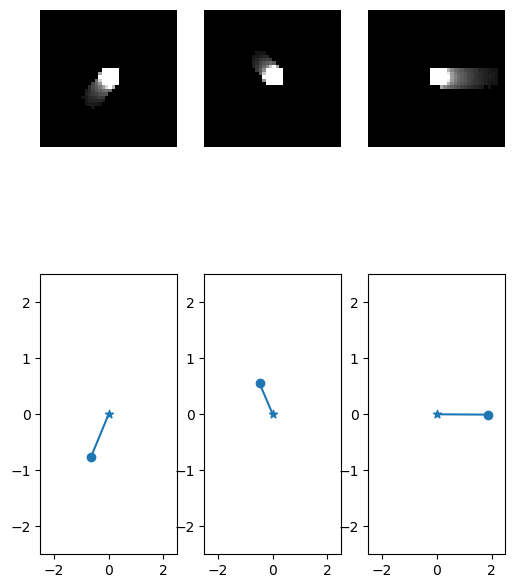

In [5]:
# plot video as a single frame and associated Y.

fig = plt.gcf()
ax = plot_latents(vid_batch, Y, nplots=nplots)
fig.tight_layout()
plt.show()



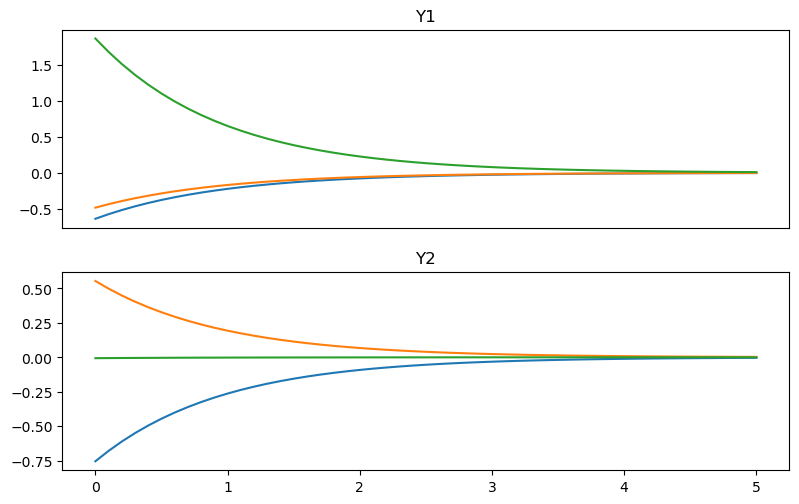

In [6]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,5))
fig.tight_layout()

for i in range(nplots):
    ax1.plot(T, Y[i,:,0])
    ax2.plot(T, Y[i,:,1])
    ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax1.set_title('Y1')
    ax2.set_title('Y2')


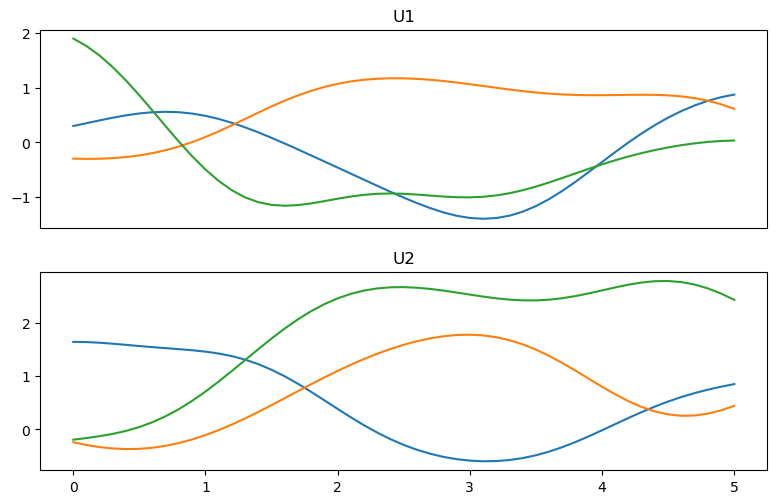

In [7]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8,5))
fig.tight_layout()

for i in range(nplots):
    ax1.plot(T, U[i,:,0])
    ax2.plot(T, U[i,:,1])
    ax1.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
    ax1.set_title('U1')
    ax2.set_title('U2')
